In [1]:
import re
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
url='https://drive.google.com/file/d/1_Fo48HcAE_yOPPYUtT0lvDWRaOpLkr0p/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [3]:
#Handle missing values
def display_missing(df):
    for col in df.columns.tolist():
        print('{} column missing value: {}'.format(col, df[col].isnull().sum()))
    print('\n')
display_missing(df)

id column missing value: 0
loan_amnt column missing value: 0
term column missing value: 0
int_rate column missing value: 0
installment column missing value: 0
sub_grade column missing value: 0
emp_length column missing value: 16239
home_ownership column missing value: 0
annual_inc column missing value: 0
verification_status column missing value: 0
issue_d column missing value: 0
loan_status column missing value: 0
purpose column missing value: 0
dti column missing value: 162
fico_range_low column missing value: 0
fico_range_high column missing value: 0
open_acc column missing value: 0
pub_rec column missing value: 0
revol_bal column missing value: 0
revol_util column missing value: 222
total_acc column missing value: 0
initial_list_status column missing value: 0
application_type column missing value: 0
mort_acc column missing value: 0
pub_rec_bankruptcies column missing value: 0




In [4]:
#DELETE NULL VALUE
df.dropna(subset=['emp_length'], inplace=True)
df.dropna(subset=['revol_util'], inplace=True)
df.dropna(subset=['dti'], inplace=True)

In [5]:
#Delete total_acc column (has no significant effect)
df.drop(['total_acc'],axis=1,inplace=True)
df.head(5)

,id,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,85787116,28875,60 months,17.99,733.08,D2,6 years,RENT,99216.0,Verified,...,725,729,8,0,5541,29.0,w,Individual,0,0
1,85695514,15000,36 months,13.99,512.60,C3,5 years,MORTGAGE,60000.0,Not Verified,...,675,679,22,1,18976,48.0,w,Individual,1,1
2,85679829,10000,36 months,14.49,344.17,C4,10+ years,OWN,122000.0,Verified,...,660,664,11,0,17218,100.7,w,Individual,1,0
3,85735840,8525,36 months,28.88,356.69,G2,5 years,RENT,25000.0,Verified,...,675,679,7,0,3008,36.2,w,Individual,0,0
4,85734871,7350,36 months,21.49,278.77,D5,6 years,RENT,23000.0,Verified,...,670,674,5,1,5529,43.9,w,Individual,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215982 entries, 0 to 232430
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    215982 non-null  int64  
 1   loan_amnt             215982 non-null  int64  
 2   term                  215982 non-null  object 
 3   int_rate              215982 non-null  float64
 4   installment           215982 non-null  float64
 5   sub_grade             215982 non-null  object 
 6   emp_length            215982 non-null  object 
 7   home_ownership        215982 non-null  object 
 8   annual_inc            215982 non-null  float64
 9   verification_status   215982 non-null  object 
 10  issue_d               215982 non-null  object 
 11  loan_status           215982 non-null  object 
 12  purpose               215982 non-null  object 
 13  dti                   215982 non-null  float64
 14  fico_range_low        215982 non-null  int64  
 15  

In [7]:
#DELETE ISSUEDATE AND ID COLUMN
df.drop(['issue_d', 'id'],axis=1,inplace=True)
df.head(5) 

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,28875,60 months,17.99,733.08,D2,6 years,RENT,99216.0,Verified,Charged Off,...,725,729,8,0,5541,29.0,w,Individual,0,0
1,15000,36 months,13.99,512.60,C3,5 years,MORTGAGE,60000.0,Not Verified,Fully Paid,...,675,679,22,1,18976,48.0,w,Individual,1,1
2,10000,36 months,14.49,344.17,C4,10+ years,OWN,122000.0,Verified,Fully Paid,...,660,664,11,0,17218,100.7,w,Individual,1,0
3,8525,36 months,28.88,356.69,G2,5 years,RENT,25000.0,Verified,Charged Off,...,675,679,7,0,3008,36.2,w,Individual,0,0
4,7350,36 months,21.49,278.77,D5,6 years,RENT,23000.0,Verified,Fully Paid,...,670,674,5,1,5529,43.9,w,Individual,0,0


In [8]:
df['loan_status'].value_counts()

Fully Paid            161034
Charged Off            46068
Late (31-120 days)      8866
Default                   14
Name: loan_status, dtype: int64

In [9]:
#Replace some values into numbers    
df['emp_length'].replace({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}, inplace=True)
df['loan_status'].replace({'Charged Off': 1, 'Late (31-120 days)': 1, 'Default' : 1, 'Fully Paid': 0}, inplace=True)
df.head(5)

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,28875,60 months,17.99,733.08,D2,6,RENT,99216.0,Verified,1,...,725,729,8,0,5541,29.0,w,Individual,0,0
1,15000,36 months,13.99,512.60,C3,5,MORTGAGE,60000.0,Not Verified,0,...,675,679,22,1,18976,48.0,w,Individual,1,1
2,10000,36 months,14.49,344.17,C4,10,OWN,122000.0,Verified,0,...,660,664,11,0,17218,100.7,w,Individual,1,0
3,8525,36 months,28.88,356.69,G2,5,RENT,25000.0,Verified,1,...,675,679,7,0,3008,36.2,w,Individual,0,0
4,7350,36 months,21.49,278.77,D5,6,RENT,23000.0,Verified,0,...,670,674,5,1,5529,43.9,w,Individual,0,0


In [10]:
numerical_features = ['fico_range_low','pub_rec','pub_rec_bankruptcies', 'revol_util', 'annual_inc', 'int_rate', 'dti',  'mort_acc', 'loan_amnt', 
       'installment','fico_range_high', 'revol_bal', 'open_acc', 'emp_length']
categorical_features = [x for x in df.columns if (x not in numerical_features and x != 'loan_status')]

print('Number of numerical features: ', len(numerical_features),
'\nNumber of categorical features: ', len(categorical_features))

Number of numerical features:  14 
Number of categorical features:  7


In [11]:
#DESCRIPTIVE STATISTICS FOR CATEGORICAL VALUES
for col in categorical_features:
    df[col] = df[col].astype('object')
df[categorical_features].describe()

,term,sub_grade,home_ownership,verification_status,purpose,initial_list_status,application_type
count,215982,215982,215982,215982,215982,215982,215982
unique,2,35,5,3,12,2,2
top,36 months,B5,MORTGAGE,Source Verified,debt_consolidation,w,Individual
freq,163775,16464,106502,92222,123117,159209,205343


In [12]:
#DESCRIPTIVE STATISTICS FOR NUMERICAL VALUES
df[numerical_features].describe().round(decimals=2)

,fico_range_low,pub_rec,pub_rec_bankruptcies,revol_util,annual_inc,int_rate,dti,mort_acc,loan_amnt,installment,fico_range_high,revol_bal,open_acc,emp_length
count,215982.00,215982.00,215982.00,215982.00,215982.00,215982.00,215982.00,215982.00,215982.0,215982.00,215982.00,215982.00,215982.00,215982.00
mean,697.73,0.25,0.16,46.82,81484.05,13.93,18.22,1.52,14591.3,449.40,701.73,15402.43,11.75,5.93
std,33.24,0.64,0.41,24.85,82577.43,5.30,11.71,1.82,9404.0,288.32,33.24,21823.33,5.78,3.73
min,660.00,0.00,0.00,0.00,100.00,5.31,-1.00,0.00,1000.0,30.12,664.00,0.00,1.00,0.00
25%,670.00,0.00,0.00,27.60,50000.00,10.49,11.64,0.00,7200.0,237.85,674.00,5374.00,8.00,2.00
50%,690.00,0.00,0.00,45.90,69790.00,12.79,17.52,1.00,12000.0,371.05,694.00,10267.50,11.00,6.00
75%,715.00,0.00,0.00,65.30,96000.00,16.99,24.05,2.00,20000.0,604.24,719.00,18367.00,15.00,10.00
max,845.00,61.00,8.00,162.00,9522972.00,30.99,999.00,29.00,40000.0,1715.42,850.00,1087664.00,80.00,10.00


In [13]:
import pandas as pd
from ipywidgets import interact, interactive
import plotly.graph_objs as go
from plotly.tools import make_subplots

In [14]:
###Calculate the count and percentage of each purpose type for each loan_status.
result = df.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)
result['Fully-paid'] = result[0] / (result[0] + result[1]) * 100
result['Charged-off'] = result[1] / (result[0] + result[1]) * 100

result = df.groupby('purpose')['loan_status'].value_counts(normalize=True).unstack(fill_value=0)
result['Fully-paid'] = (result[0] * 100).round(1)  
result['Charged-off'] = (result[1] * 100).round(1)  

In [ ]:
import plotly.graph_objects as go
top_3_high_charged_off = result.nlargest(3, 'Charged-off')
top_3_low_charged_off = result.nsmallest(3, 'Charged-off')
fig = go.Figure()

fig.add_trace(go.Bar(
    y=top_3_high_charged_off.index,
    x=top_3_high_charged_off['Fully-paid'],
    name='Fully-paid',
    orientation='h',
    marker=dict(color='rgba(148, 204, 255, 0.3)'),
    text=top_3_high_charged_off['Fully-paid'],
    textposition='inside',
))

fig.add_trace(go.Bar(
    y=top_3_high_charged_off.index,
    x=top_3_high_charged_off['Charged-off'],
    name='Charged-off',
    orientation='h',
    marker=dict(color='rgba(148, 204, 255, 0.71)'),
    text=top_3_high_charged_off['Charged-off'],
    textposition='inside',
    showlegend=False,  
))

fig.add_trace(go.Bar(
    y=top_3_low_charged_off.index,
    x=top_3_low_charged_off['Fully-paid'],
    name='Fully-paid',
    orientation='h',
    marker=dict(color='rgba(148, 204, 255, 0.3)'),
    text=top_3_low_charged_off['Fully-paid'],
    textposition='inside',
    showlegend=False,  
))

fig.add_trace(go.Bar(
    y=top_3_low_charged_off.index,
    x=top_3_low_charged_off['Charged-off'],
    name='Charged-off',
    orientation='h',
    marker=dict(color='rgba(148, 204, 255, 0.71)'),
    text=top_3_low_charged_off['Charged-off'],
    textposition='inside',
    showlegend=True, 
))

fig.update_layout(
    barmode='stack',
    title='Percentage of Fully-paid and Charged-off by Loan Purpose',
    xaxis_title='Percentage (%)',
    yaxis_title='Loan Purpose',
    legend_title='Loan Status',
    yaxis=dict(autorange="reversed")
)

fig.show()


In [ ]:
# Import libraries
import plotly.graph_objects as go

P = df[df['loan_status'] == 0]['fico_range_high'].tolist()
N = df[df['loan_status'] == 1]['fico_range_high'].tolist()

# Create the box plots
fig = go.Figure()

fig.add_trace(go.Box(
    y=P,
    name="Fully-Paid",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all',
    marker=dict(color='rgb(150, 198, 109)'),
    line=dict(color='rgb(111, 200, 37)'),
))

fig.add_trace(go.Box(
    y=N,
    name="Charged-Off",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all',
    marker=dict(color='rgb(124, 236, 212)'),
    line=dict(color='rgb(38, 214, 177)'),
))

# Customize layout
fig.update_layout(
    title="Box Plot of Credit Scores for Fully Paid and Charged Off Loans ",
    xaxis_title="Loan_Status",
    yaxis_title="The upper boundary range the borrower FICO",
    height=700,
)

# Display the plot
fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

default_totals = df.groupby("loan_status").size().to_dict()
home_ownership_counts = df.groupby(["loan_status", "home_ownership"]).size().unstack()

colors = ["#94ccff", "#b5dcfe", "#e0f8f8", "#1B5E20", "#2E7D32"]  
status_map = {
    "MORTGAGE": {"name": "Mortgage", "color": colors[0]},
    "OWN": {"name": "Own", "color": colors[1]},
    "RENT": {"name": "Rent", "color": colors[2]},
    "NONE": {"name": "None", "color": colors[3]},
    "ANY": {"name": "Any", "color": colors[4]}
}

for status in home_ownership_counts.columns:
    for loan_status in default_totals:
        home_ownership_counts[status][loan_status] = round(
            (home_ownership_counts[status][loan_status] / default_totals[loan_status]) * 100, 2
        )

fig = go.Figure(
    data=[
        go.Bar(
            name=status_map[status]["name"],
            x=[0, 1],  
            y=home_ownership_counts[status],
            text=home_ownership_counts[status].astype(str) + "%",
            textposition="auto",
            marker_color=status_map[status]["color"],
        )
        for status in home_ownership_counts.columns
    ]
)

fig.update_layout(
    barmode="stack",
    xaxis_title="Loan Repayment Status",
    xaxis_tickvals=[0, 1],
    xaxis_ticktext=["Fully-Paid", "Charged-Off"],
    title="Housing Situation by Loan Repayment Status",
    title_x=0.5,
    showlegend=True,
    width=600,
    height=500,
    margin=dict(l=20, r=10, b=20, t=40),
)

fig.show()

In [ ]:

import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[(df['loan_amnt'] >= Q1 - 1.5 * IQR) & (df['loan_amnt'] <= Q3 + 1.5 * IQR)]

default_0_df = df_filtered[df_filtered['loan_status'] == 0]  
default_1_df = df_filtered[df_filtered['loan_status'] == 1]  

trace0 = go.Histogram(
    x=default_0_df['loan_amnt'],
    histnorm='percent',
    name='Fully-Paid',
    marker=dict(color='rgba(148, 204, 255, 0.71)'),
    nbinsx=15  
)

trace1 = go.Histogram(
    x=default_1_df['loan_amnt'],
    histnorm='percent',
    name='Charged-Off',
    marker=dict(color='rgba(255, 182, 193, 0.6)'),
    nbinsx=16  
)

fig = make_subplots(rows=1, cols=2, subplot_titles=("Fully-Paid", "Charged-Off"))

fig.add_trace(trace0, row=1, col=1)
fig.add_trace(trace1, row=1, col=2)

max_annual_inc = max(df_filtered['loan_amnt'].max(), default_0_df['loan_amnt'].max(), default_1_df['loan_amnt'].max())

fig.update_layout(
    title='Distribution of Loan Amount by Loan Repayment Status',
    showlegend=True,
    yaxis=dict(title='Percentage'),
)

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[(df['annual_inc'] >= Q1 - 1.5 * IQR) & (df['annual_inc'] <= Q3 + 1.5 * IQR)]

default_0_df = df_filtered[df_filtered['loan_status'] == 0]  
default_1_df = df_filtered[df_filtered['loan_status'] == 1]  

trace0 = go.Histogram(
    x=default_0_df['annual_inc'],
    histnorm='percent',
    name='Fully-Paid',
    marker=dict(color='rgba(148, 204, 255, 0.71)'),
    nbinsx=15  
)

trace1 = go.Histogram(
    x=default_1_df['annual_inc'],
    histnorm='percent',
    name='Charged-Off',
    marker=dict(color='rgba(255, 182, 193, 0.6)'),
    nbinsx=16  
)

fig = make_subplots(rows=1, cols=2, subplot_titles=("Fully-Paid", "Charged-Off"))

fig.add_trace(trace0, row=1, col=1)
fig.add_trace(trace1, row=1, col=2)

max_annual_inc = max(df_filtered['annual_inc'].max(), default_0_df['annual_inc'].max(), default_1_df['annual_inc'].max())

fig.update_layout(
    title='Distribution of Annual Income by Loan Repayment Status',
    showlegend=True,
    yaxis=dict(title='Percentage'),
)

fig.show()


In [14]:
df['sub_grade'].replace({'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5,
    'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10,
    'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'C5': 15,
    'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20,
    'E1': 21, 'E2': 22, 'E3': 23, 'E4': 24, 'E5': 25,
    'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29, 'F5': 30,
    'G1': 31, 'G2': 32, 'G3': 33, 'G4': 34, 'G5': 35
  }
, inplace=True)
df['term'].replace({' 36 months': 0, ' 60 months':1}, inplace=True)
df['home_ownership'].replace( {
    'MORTGAGE': 1,
    'ANY': 2,
    'OWN': 3,
    'NONE': 4,
    'RENT': 5
  }, inplace=True)
df['purpose'].replace({
    'major_purchase': 1,
    'other': 2,
    'debt_consolidation': 3,
    'credit_card': 4,
    'home_improvement': 5,
    'moving': 6,
    'car': 7,
    'vacation': 8,
    'small_business': 9,
    'medical': 10,
    'house': 11,
    'renewable_energy': 12
  }, inplace=True)

df['application_type'].replace({'Individual': 1, 'Joint App': 2,}, inplace=True)
df['verification_status'].replace({'Not Verified': 1, 'Verified': 2, 'Source Verified': 3}, inplace=True)
df['initial_list_status'].replace({'w': 1, 'f': 2}, inplace=True)

In [15]:
df['sub_grade'] = df['sub_grade'].astype('int64')
df['term'] = df['term'].astype('int64')
df['home_ownership'] = df['home_ownership'].astype('int64')
df['fico_range_low'] = df['fico_range_low'].astype('int64')
df['pub_rec'] = df['pub_rec'].astype('int64')
df['revol_util'] = df['revol_util'].astype('int64')
df['annual_inc'] = df['annual_inc'].astype('int64')
df['int_rate'] = df['int_rate'].astype('int64')
df['dti'] = df['dti'].astype('int64')
df['purpose'] = df['purpose'].astype('int64')
df['mort_acc'] = df['mort_acc'].astype('int64')
df['loan_amnt'] = df['loan_amnt'].astype('int64')
df['application_type'] = df['application_type'].astype('int64')
df['installment'] = df['installment'].astype('int64')
df['verification_status'] = df['verification_status'].astype('int64')
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype('int64')
df['initial_list_status'] = df['initial_list_status'].astype('int64')
df['fico_range_high'] = df['fico_range_high'].astype('int64')
df['revol_bal'] = df['revol_bal'].astype('int64')
df['open_acc'] = df['open_acc'].astype('int64')
df['emp_length'] = df['emp_length'].astype('int64')
df['loan_status'] = df['loan_status'].astype('int64')

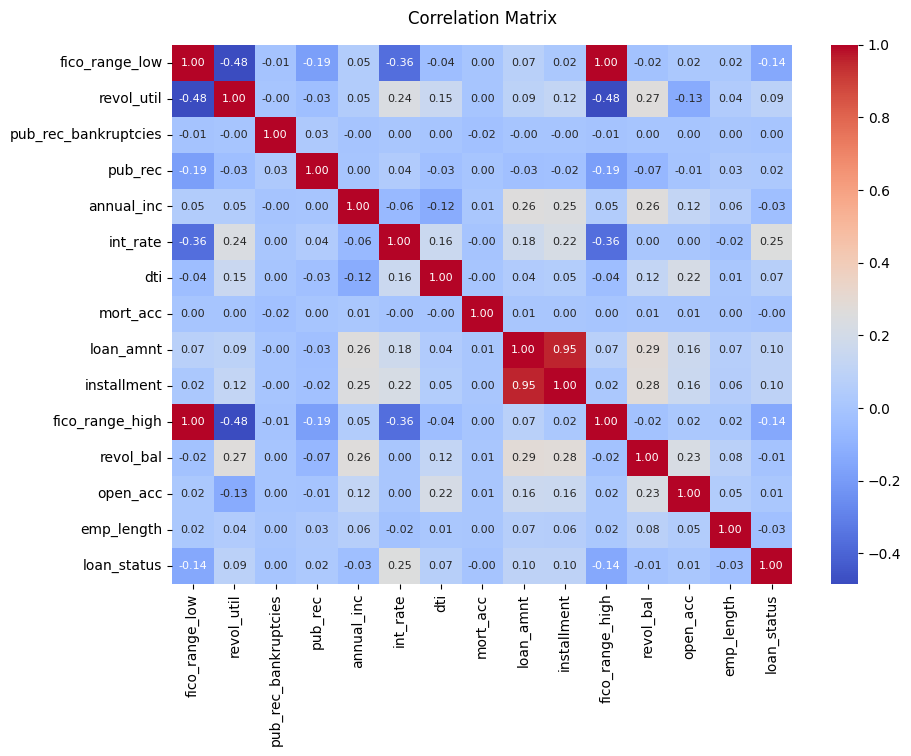

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.DataFrame(df,columns = ['fico_range_low', 'revol_util', 'pub_rec_bankruptcies', 'pub_rec',
'annual_inc', 'int_rate', 'dti', 'mort_acc', 'loan_amnt', 'installment', 'fico_range_high', 'revol_bal', 'open_acc', 'emp_length', 'loan_status' ])
corrMatrix = df1.corr()

plt.figure(figsize=(10, 7)) 
colormap = sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 8, "ha": 'center', "va": 'center'}, fmt=".2f", cmap=colormap)

plt.title('Correlation Matrix', fontsize=12, pad=15)

plt.show()


In [12]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
target = ['loan_status']
features = ['sub_grade', 'term', 'home_ownership', 'fico_range_low',
       'pub_rec', 'revol_util', 'annual_inc', 'int_rate', 'dti', 'purpose',
       'mort_acc', 'loan_amnt', 'application_type', 'installment',
       'verification_status', 'pub_rec_bankruptcies', 'initial_list_status',
       'fico_range_high', 'revol_bal', 'open_acc', 'emp_length',]

In [18]:
X = df[features].values
y = df[target].values

n_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=n_state)

In [19]:
# Perform feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
#TRAIN RANDOM FOREST MODEL
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train.ravel())

y_pred = RF_classifier.predict(X_train)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_train,y_pred))

print('Random Forest accuracy: ', round(accuracy_score(y_train, y_pred),2))

Confusion matrix:
        0      1
0  128678      0
1       3  44104 

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    128678
           1       1.00      1.00      1.00     44107

    accuracy                           1.00    172785
   macro avg       1.00      1.00      1.00    172785
weighted avg       1.00      1.00      1.00    172785

Random Forest accuracy:  1.0


In [32]:
#TEST RANDOM FOREST MODEL
y_pred = RF_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Random Forest accuracy: ', accuracy_score(y_test, y_pred))

[[31026  1330]
 [ 9415  1426]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.85     32356
           1       0.52      0.13      0.21     10841

    accuracy                           0.75     43197
   macro avg       0.64      0.55      0.53     43197
weighted avg       0.70      0.75      0.69     43197

Random Forest accuracy:  0.7512558742505266


In [33]:
#ROC - RANDOM FOREST
y_pred_prob_test = RF_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
roc_auc 

0.6829095423162725

In [34]:
#TRAIN XGB CLASSIFER
XGB_classifier = XGBClassifier()
XGB_classifier .fit(X_train, y_train.ravel())

y_pred = XGB_classifier.predict(X_train)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_train,y_pred))

print('XGB Classifier accuracy: ', round(accuracy_score(y_train, y_pred),2))

Confusion matrix:
        0     1
0  125102  3576
1   35559  8548 

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86    128678
           1       0.71      0.19      0.30     44107

    accuracy                           0.77    172785
   macro avg       0.74      0.58      0.58    172785
weighted avg       0.76      0.77      0.72    172785

XGB Classifier accuracy:  0.77


In [35]:
#TEST XGB CLASSIFIER
y_pred = XGB_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('XGBoost accuracy: ', accuracy_score(y_test, y_pred))

[[30969  1387]
 [ 9300  1541]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.85     32356
           1       0.53      0.14      0.22     10841

    accuracy                           0.75     43197
   macro avg       0.65      0.55      0.54     43197
weighted avg       0.71      0.75      0.69     43197

XGBoost accuracy:  0.7525985600851911


In [36]:
#ROC XGB CLASSIFIER
y_pred_prob_test = XGB_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
roc_auc 

0.6985500308582744

In [37]:
importance_xgb = XGB_classifier.feature_importances_
features_importances_xgb = pd.DataFrame({'FeatureName': df.columns[0:len(df.columns)-1], 'XGBoost Feature Importance': importance_xgb})
features_importances_xgb.sort_values(by=['XGBoost Feature Importance'], ascending=False)

,FeatureName,XGBoost Feature Importance
0,loan_amnt,0.298955
7,annual_inc,0.125998
2,int_rate,0.092489
1,term,0.082100
11,dti,0.038469
12,fico_range_low,0.034524
3,installment,0.033594
13,fico_range_high,0.030052
14,open_acc,0.029119
8,verification_status,0.028372


<AxesSubplot: ylabel='FeatureName'>

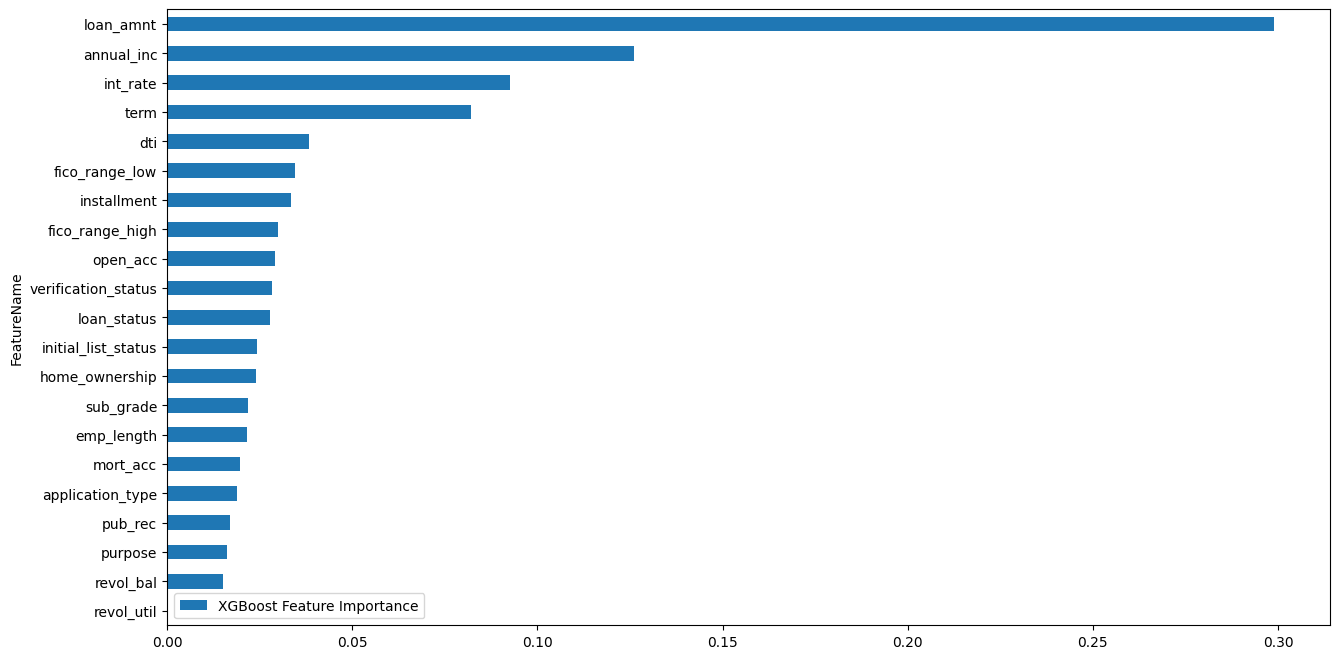

In [38]:
features_importances_xgb.sort_values("XGBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["XGBoost Feature Importance"], kind="barh")

In [39]:
#TRAIN LOGISTIC REGRESSION MODEL
LR_classifier = LogisticRegression(multi_class='multinomial',random_state=n_state)
LR_classifier.fit(X_train, y_train.ravel())
y_pred = LR_classifier.predict(X_train)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')
print('Classification report:')
print(classification_report(y_train,y_pred))
print('Logistic Regression accuracy: ', round(accuracy_score(y_train, y_pred),4))

Confusion matrix:
        0     1
0  125075  3603
1   39674  4433 

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85    128678
           1       0.55      0.10      0.17     44107

    accuracy                           0.75    172785
   macro avg       0.66      0.54      0.51    172785
weighted avg       0.71      0.75      0.68    172785

Logistic Regression accuracy:  0.7495


In [40]:
#TEST LOGISTIC REGRESSION MODEL
y_pred = LR_classifier.predict(X_test)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')
print('Classification report:')
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', round(accuracy_score(y_test, y_pred),4))


Confusion matrix:
       0     1
0  31386   970
1   9746  1095 

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85     32356
           1       0.53      0.10      0.17     10841

    accuracy                           0.75     43197
   macro avg       0.65      0.54      0.51     43197
weighted avg       0.70      0.75      0.68     43197

Logistic Regression accuracy:  0.7519


In [41]:
# ROC-LOGISTIC REGRESSION MODEL
y_pred_prob_test = LR_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
roc_auc 

0.6918148251746274

In [42]:
#TRAIN DECISION TREE MODEL
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train.ravel())

y_pred = DT_classifier.predict(X_train)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_train,y_pred))

print('Decision Tree accuracy: ', round(accuracy_score(y_train, y_pred),2))

Confusion matrix:
        0      1
0  128678      0
1       0  44107 

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    128678
           1       1.00      1.00      1.00     44107

    accuracy                           1.00    172785
   macro avg       1.00      1.00      1.00    172785
weighted avg       1.00      1.00      1.00    172785

Decision Tree accuracy:  1.0


In [43]:
#TEST DECISION TREE MODEL
y_pred = DT_classifier.predict(X_test)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('Decision Tree accuracy: ', round(accuracy_score(y_test, y_pred),2))

Confusion matrix:
       0     1
0  24264  8092
1   7048  3793 

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     32356
           1       0.32      0.35      0.33     10841

    accuracy                           0.65     43197
   macro avg       0.55      0.55      0.55     43197
weighted avg       0.66      0.65      0.65     43197

Decision Tree accuracy:  0.65


In [44]:
#ROC DECISION TREE
y_pred_prob_test = DT_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
roc_auc 

0.5498913771178764

In [45]:
#TRAIN ADA BOOST
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train.ravel())
y_pred = ada_classifier.predict(X_train)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train, y_pred)), '\n')
print('Classification report:')
print(classification_report(y_train, y_pred))
print('ADA Boost accuracy:', round(accuracy_score(y_train, y_pred), 2))

Confusion matrix:
        0     1
0  124718  3960
1   39183  4924 

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85    128678
           1       0.55      0.11      0.19     44107

    accuracy                           0.75    172785
   macro avg       0.66      0.54      0.52    172785
weighted avg       0.71      0.75      0.68    172785

ADA Boost accuracy: 0.75


In [46]:
#TEST ADA BOOST
y_pred = ada_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('ADABoost accuracy: ', accuracy_score(y_test, y_pred))

[[31320  1036]
 [ 9620  1221]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.85     32356
           1       0.54      0.11      0.19     10841

    accuracy                           0.75     43197
   macro avg       0.65      0.54      0.52     43197
weighted avg       0.71      0.75      0.69     43197

ADABoost accuracy:  0.7533162025140635


In [47]:
#ROC ADA
y_pred_prob_test = ada_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
roc_auc 

0.693009745868788

In [19]:
pip install lightgbm


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 1.3/1.3 MB 7.1 MB/s eta 0:00:00


In [20]:
import lightgbm as lgb

In [23]:
#TRAIN LIGHT GBM
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train.ravel())
y_pred = lgbm.predict(X_train)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train, y_pred)), '\n')
print('Classification report:')
print(classification_report(y_train, y_pred))
print('Light GBM accuracy:', round(accuracy_score(y_train, y_pred), 2))

[LightGBM] [Info] Number of positive: 44107, number of negative: 128678
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1562
[LightGBM] [Info] Number of data points in the train set: 172785, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.255271 -> initscore=-1.070695
[LightGBM] [Info] Start training from score -1.070695
Confusion matrix:
        0     1
0  125025  3653
1   38124  5983 

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86    128678
           1       0.62      0.14      0.22     44107

    accuracy                           0.76    172785
   macro avg       0.69      0.55      0.54    172785
weighted avg       0.73      0.76      0.69    172785

Light GBM accuracy: 0.76


In [24]:
#TEST LIGHT GBM 
y_pred = lgbm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('LightGBM accuracy: ', accuracy_score(y_test, y_pred))

[[31273  1083]
 [ 9492  1349]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.86     32356
           1       0.55      0.12      0.20     10841

    accuracy                           0.76     43197
   macro avg       0.66      0.55      0.53     43197
weighted avg       0.71      0.76      0.69     43197

LightGBM accuracy:  0.7551913327314397


In [25]:
#ROC LIGHT GBM
y_pred_prob_test = lgbm.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
roc_auc 

0.7028313534436542

In [ ]:
loan_status_counts = df['loan_status'].value_counts()

fully_paid_percent = round(loan_status_counts[0] / loan_status_counts.sum() * 100, 2)
charged_off_percent = round(loan_status_counts[1] / loan_status_counts.sum() * 100, 2)

status_labels = ['Fully-Paid', 'Charged-Off']
values = [fully_paid_percent, charged_off_percent]
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=status_labels, values=values, hole=.3)])

fig.update_layout(title='Percentage of Fully-Paid and Charged-Off Cases',
                  font=dict(family="Arial", size=12),
                  margin=dict(l=20, r=20, t=40, b=20),
                  paper_bgcolor='white', 
                  plot_bgcolor='white',  
                  legend=dict(orientation="v", yanchor="top", xanchor="right", x=1.02, y=1),  
                  width=600,  
                  height=400)  

fig.update_traces(marker=dict(colors=['#c7e5ff', '#94ccff']))

fig.show()

In [ ]:
loan_status_counts = df['loan_status'].value_counts()
loan_status_counts

0    161034
1     54948
Name: loan_status, dtype: int64

In [20]:
####UPSAMPLING TECHNIQUE 
from sklearn.utils import resample
df_majority = df[df['loan_status']==0] 
df_minority = df[df['loan_status']==1] 
df_minority_upsampled = resample(df_minority,
 replace=True, # sample with replacement
 n_samples=len(df_majority), 
 random_state=1234) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.value_counts('loan_status')

loan_status
0    161034
1    161034
dtype: int64

In [ ]:
loan_status_counts = df_upsampled['loan_status'].value_counts()

fully_paid_percent = round(loan_status_counts[0] / loan_status_counts.sum() * 100, 2)
charged_off_percent = round(loan_status_counts[1] / loan_status_counts.sum() * 100, 2)

status_labels = ['Fully-Paid', 'Charged-Off']
values = [fully_paid_percent, charged_off_percent]
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=status_labels, values=values, hole=.3)])

fig.update_layout(title='Percentage of Fully-Paid and Charged-Off Cases',
                  font=dict(family="Arial", size=12),
                  margin=dict(l=20, r=20, t=40, b=20),
                  paper_bgcolor='white', 
                  plot_bgcolor='white',  
                  legend=dict(orientation="v", yanchor="top", xanchor="right", x=1.02, y=1),  
                  width=600,  
                  height=400)  

fig.update_traces(marker=dict(colors=['#c7e5ff', '#94ccff']))

fig.show()

In [21]:
features = df_upsampled.drop('loan_status', axis=1)
target = df_upsampled.loan_status

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [29]:
#TRAIN RANDOM FOREST MODEL
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train.ravel())

y_pred = RF_classifier.predict(X_train)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_train,y_pred))

print('Random Forest accuracy: ', round(accuracy_score(y_train, y_pred),2))

Confusion matrix:
        0       1
0  128825       0
1       0  128829 

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    128825
           1       1.00      1.00      1.00    128829

    accuracy                           1.00    257654
   macro avg       1.00      1.00      1.00    257654
weighted avg       1.00      1.00      1.00    257654

Random Forest accuracy:  1.0


In [30]:
#TEST RANDOM FOREST MODEL
y_pred = RF_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Random Forest accuracy: ', accuracy_score(y_test, y_pred))

[[28651  3558]
 [ 2176 30029]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     32209
           1       0.89      0.93      0.91     32205

    accuracy                           0.91     64414
   macro avg       0.91      0.91      0.91     64414
weighted avg       0.91      0.91      0.91     64414

Random Forest accuracy:  0.9109820846399851


In [31]:
#ROC RANDOM FOREST
y_pred_prob_test = RF_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
roc_auc

0.9693219513568542

In [36]:
pip install -U scikit-learn


     --------------------------------------- 10.6/10.6 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.0
    Uninstalling scikit-learn-1.2.0:
      Successfully uninstalled scikit-learn-1.2.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\Python\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
#TRAIN XGB CLASSIFER
XGB_classifier = XGBClassifier()
XGB_classifier .fit(X_train, y_train.ravel())

y_pred = XGB_classifier.predict(X_train)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_train,y_pred))

print('XGB Classifier accuracy: ', round(accuracy_score(y_train, y_pred),2))

Confusion matrix:
       0      1
0  85602  43223
1  35067  93762 

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.66      0.69    128825
           1       0.68      0.73      0.71    128829

    accuracy                           0.70    257654
   macro avg       0.70      0.70      0.70    257654
weighted avg       0.70      0.70      0.70    257654

XGB Classifier accuracy:  0.7


In [27]:
#TEST XGB CLASSIFIER
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train.ravel())

y_pred = XGB_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('XGBoost accuracy: ', accuracy_score(y_test, y_pred))

[[20475 11734]
 [ 9515 22690]]
              precision    recall  f1-score   support

           0       0.68      0.64      0.66     32209
           1       0.66      0.70      0.68     32205

    accuracy                           0.67     64414
   macro avg       0.67      0.67      0.67     64414
weighted avg       0.67      0.67      0.67     64414

XGBoost accuracy:  0.6701182972645698


In [28]:
#ROC XGB CLASSIFIER
y_pred_prob_test = XGB_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
roc_auc 

0.735975205199078

In [30]:
#TRAIN LOGISTIC REGRESSION MODEL
LR_classifier = LogisticRegression(multi_class='multinomial',random_state=n_state)
LR_classifier.fit(X_train, y_train.ravel())
y_pred = LR_classifier.predict(X_train)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')
print('Classification report:')
print(classification_report(y_train,y_pred))
print('Logistic Regression accuracy: ', round(accuracy_score(y_train, y_pred),4))


Confusion matrix:
       0      1
0  84329  44496
1  50481  78348 

Classification report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64    128825
           1       0.64      0.61      0.62    128829

    accuracy                           0.63    257654
   macro avg       0.63      0.63      0.63    257654
weighted avg       0.63      0.63      0.63    257654

Logistic Regression accuracy:  0.6314


In [31]:
#TEST LOGISTIC REGRESSION MODEL
y_pred = LR_classifier.predict(X_test)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')
print('Classification report:')
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', round(accuracy_score(y_test, y_pred),4))


Confusion matrix:
       0      1
0  20912  11297
1  12641  19564 

Classification report:
              precision    recall  f1-score   support

           0       0.62      0.65      0.64     32209
           1       0.63      0.61      0.62     32205

    accuracy                           0.63     64414
   macro avg       0.63      0.63      0.63     64414
weighted avg       0.63      0.63      0.63     64414

Logistic Regression accuracy:  0.6284


In [32]:
# ROC-LOGISTIC REGRESSION MODEL
y_pred_prob_test = LR_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
roc_auc 

0.6807513200408126

In [33]:
#TRAIN DECISION TREE MODEL
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train.ravel())

y_pred = DT_classifier.predict(X_train)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_train,y_pred))

print('Decision Tree accuracy: ', round(accuracy_score(y_train, y_pred),2))

Confusion matrix:
        0       1
0  128825       0
1       0  128829 

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    128825
           1       1.00      1.00      1.00    128829

    accuracy                           1.00    257654
   macro avg       1.00      1.00      1.00    257654
weighted avg       1.00      1.00      1.00    257654

Decision Tree accuracy:  1.0


In [34]:
#TEST DECISION TREE MODEL
y_pred = DT_classifier.predict(X_test)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('Decision Tree accuracy: ', round(accuracy_score(y_test, y_pred),2))

Confusion matrix:
       0      1
0  23761   8448
1   1967  30238 

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82     32209
           1       0.78      0.94      0.85     32205

    accuracy                           0.84     64414
   macro avg       0.85      0.84      0.84     64414
weighted avg       0.85      0.84      0.84     64414

Decision Tree accuracy:  0.84


In [35]:
#ROC - DECISSION TREE
y_pred_prob_test = DT_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
roc_auc 

0.8383177945622378

In [36]:
#TRAIN ADA BOOST
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train.ravel())
y_pred = ada_classifier.predict(X_train)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train, y_pred)), '\n')
print('Classification report:')
print(classification_report(y_train, y_pred))
print('ADA Boost accuracy:', round(accuracy_score(y_train, y_pred), 2))

Confusion matrix:
       0      1
0  77615  51210
1  41107  87722 

Classification report:
              precision    recall  f1-score   support

           0       0.65      0.60      0.63    128825
           1       0.63      0.68      0.66    128829

    accuracy                           0.64    257654
   macro avg       0.64      0.64      0.64    257654
weighted avg       0.64      0.64      0.64    257654

ADA Boost accuracy: 0.64


In [37]:
#TEST ADA BOOST
y_pred = ada_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('ADABoost accuracy: ', accuracy_score(y_test, y_pred))

[[19298 12911]
 [10252 21953]]
              precision    recall  f1-score   support

           0       0.65      0.60      0.62     32209
           1       0.63      0.68      0.65     32205

    accuracy                           0.64     64414
   macro avg       0.64      0.64      0.64     64414
weighted avg       0.64      0.64      0.64     64414

ADABoost accuracy:  0.6404042599434906


In [38]:
#ROC ADA
y_pred_prob_test = ada_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
roc_auc 

0.6943534428861173

In [39]:
#TRAIN LIGHT GBM
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train.ravel())
y_pred = lgbm.predict(X_train)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train, y_pred)), '\n')
print('Classification report:')
print(classification_report(y_train, y_pred))
print('Light GBM accuracy:', round(accuracy_score(y_train, y_pred), 2))

[LightGBM] [Info] Number of positive: 128829, number of negative: 128825
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1561
[LightGBM] [Info] Number of data points in the train set: 257654, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000031
[LightGBM] [Info] Start training from score 0.000031
Confusion matrix:
       0      1
0  81468  47357
1  39007  89822 

Classification report:
              precision    recall  f1-score   support

           0       0.68      0.63      0.65    128825
           1       0.65      0.70      0.68    128829

    accuracy                           0.66    257654
   macro avg       0.67      0.66      0.66    257654
weighted avg       0.67      0.66      0.66    257654

Light GBM accuracy: 0.6

In [40]:
#TEST LIGHT GBM 
y_pred = lgbm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('LightGBM accuracy: ', accuracy_score(y_test, y_pred))

[[19995 12214]
 [10084 22121]]
              precision    recall  f1-score   support

           0       0.66      0.62      0.64     32209
           1       0.64      0.69      0.66     32205

    accuracy                           0.65     64414
   macro avg       0.65      0.65      0.65     64414
weighted avg       0.65      0.65      0.65     64414

LightGBM accuracy:  0.6538330176669668


In [41]:
#ROC LIGHT GBM
y_pred_prob_test = lgbm.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
roc_auc 

0.7147036653929015

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

In [ ]:
roc_RF = [] 
acc_RF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=features,y=target)):
    
    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_test,y_pred))
    roc=roc_auc_score(y_test,y_pred)
    acc=accuracy_score(y_test, y_pred)
    acc_RF.append(acc)
    roc_RF.append(roc)
    print(f"The accuracy for {fold+1} : {acc}")
    print(f"The AUC for {fold+1} : {roc}")

mean_acc = sum(acc_RF) / len(acc_RF)
mean_roc_auc = sum(roc_RF) / len(roc_RF)

print("Mean accuracy across folds:", mean_acc)
print("Mean ROC AUC across folds:", mean_roc_auc)


In [ ]:
roc_XGB = [] 
acc_XGB=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=features,y=target)):
    
    clf=XGBClassifier(n_estimators=200)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_test,y_pred))
    roc=roc_auc_score(y_test,y_pred)
    acc=accuracy_score(y_test, y_pred)
    acc_XGB.append(acc)
    roc_XGB.append(roc)
    print(f"The accuracy for {fold+1} : {acc}")
    print(f"The AUC for {fold+1} : {roc}")

mean_acc_1 = sum(acc_XGB) / len(acc_XGB)
mean_roc_auc_1 = sum(roc_XGB) / len(roc_XGB)

print("Mean accuracy across folds:", mean_acc_1)
print("Mean ROC AUC across folds:", mean_roc_auc_1)


In [ ]:
roc_LR = [] 
acc_LR=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=features,y=target)):
    
    clf=LogisticRegression(multi_class='multinomial')
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_test,y_pred))
    roc=roc_auc_score(y_test,y_pred)
    acc=accuracy_score(y_test, y_pred)
    acc_LR.append(acc)
    roc_LR.append(roc)
    print(f"The accuracy for {fold+1} : {acc}")
    print(f"The AUC for {fold+1} : {roc}")

mean_acc_2 = sum(acc_LR) / len(acc_LR)
mean_roc_auc_2 = sum(roc_LR) / len(roc_LR)

print("Mean accuracy across folds:", mean_acc_2)
print("Mean ROC AUC across folds:", mean_roc_auc_2)


In [ ]:
roc_DT = [] 
acc_DT=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=features,y=target)):
    
    clf=DecisionTreeClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_test,y_pred))
    roc=roc_auc_score(y_test,y_pred)
    acc=accuracy_score(y_test, y_pred)
    acc_DT.append(acc)
    roc_DT.append(roc)
    print(f"The accuracy for {fold+1} : {acc}")
    print(f"The AUC for {fold+1} : {roc}")

mean_acc_3 = sum(acc_DT) / len(acc_DT)
mean_roc_auc_3 = sum(roc_DT) / len(roc_DT)

print("Mean accuracy across folds:", mean_acc_3)
print("Mean ROC AUC across folds:", mean_roc_auc_3)


In [ ]:
roc_ADA = [] 
acc_ADA=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=features,y=target)):
    
    clf=AdaBoostClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_test,y_pred))
    roc=roc_auc_score(y_test,y_pred)
    acc=accuracy_score(y_test, y_pred)
    acc_ADA.append(acc)
    roc_ADA.append(roc)
    print(f"The accuracy for {fold+1} : {acc}")
    print(f"The AUC for {fold+1} : {roc}")

mean_acc_4 = sum(acc_ADA) / len(acc_ADA)
mean_roc_auc_4 = sum(roc_ADA) / len(roc_ADA)

print("Mean accuracy across folds:", mean_acc_4)
print("Mean ROC AUC across folds:", mean_roc_auc_4)


In [ ]:
roc_LGBM = [] 
acc_LGBM=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=features,y=target)):
    
    clf=lgb.LGBMClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_test,y_pred))
    roc=roc_auc_score(y_test,y_pred)
    acc=accuracy_score(y_test, y_pred)
    acc_LGBM.append(acc)
    roc_LGBM.append(roc)
    print(f"The accuracy for {fold+1} : {acc}")
    print(f"The AUC for {fold+1} : {roc}")

mean_acc_5 = sum(acc_LGBM) / len(acc_LGBM)
mean_roc_auc_5 = sum(roc_LGBM) / len(roc_LGBM)

print("Mean accuracy across folds:", mean_acc_5)
print("Mean ROC AUC across folds:", mean_roc_auc_5)

In [96]:
import plotly.graph_objects as go

# Prepare data
models = ["Random Forest", "XGBoost", "Logistic Regression", "Decision Tree", "AdaBoost", "Light GBM"]
mean_roc = [mean_roc_auc, mean_roc_auc_1, mean_roc_auc_2, mean_roc_auc_3, mean_roc_auc_4, mean_roc_auc_5]

# Create a list of Mean AUC ROC
mean_roc_sorted = []
models_sorted = []
for model, auc in sorted(zip(models, mean_roc), key=lambda x: x[1], reverse=True):
    models_sorted.append(model)
    mean_roc_sorted.append(auc)

# Set a single color for all bars
color = '#94ccff'  # Color for all bars

# Round mean AUC values to 2 decimal places
mean_roc_rounded = [round(auc, 3) for auc in mean_roc_sorted]

# Update the chart data
fig = go.Figure(data=
    go.Bar(name="ROC AUC", x=models_sorted, y=mean_roc_rounded, marker=dict(color=color))
)

# Add text annotations with rounded mean AUC values above each bar
for model, auc in zip(models_sorted, mean_roc_rounded):
    fig.add_annotation(x=model, y=auc, text=str(auc), showarrow=False, font=dict(color='black'), yshift=10)

# Format the chart
fig.update_layout(title="Comparison of ROC-AUC across models", barmode='group')
fig.update_xaxes(title="Model")
fig.update_yaxes(title="Value")

# Show the chart
fig.show()
